<script type="text/x-mathjax-config">
  MathJax.Hub.Config({
    tex2jax: {
      inlineMath: [['$','$'], ['\\(','\\)']],
      displayMath: [['$$','$$'], ['\\[','\\]']]
    },
    TeX: {
      extensions: ["color.js"]
    },
    "HTML-CSS": {
      availableFonts: ["TeX"],
      linebreaks: { automatic: true }
    }
  });
</script>

<script src="https://cdn.jsdelivr.net/npm/mathjax@2/MathJax.js?config=TeX-AMS-MML_HTMLorMML" type="text/javascript"></script>

<style>
@media all {
  body {
    font-weight: 700;
  }
  /* Rende le formule MathJax più spesse */
  .MathJax, .MathJax_Display {
    font-weight: bold; /* Aumenta lo spessore delle formule */
  }
  .bold-text {
    font-weight: bold;
  }
  .heavy-text {
    font-weight: 700;
  }
}
</style>

# <span style="color: red;">WINE</span>
---
## Metadata

<span style="font-size: 14px;">

- Using chemical analysis to determine the origin of wines.
- Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine)
- UCI_id: 109
- Year: 1991
- Number of Instances: 178
- Number of Attributes: 13
- Summary: These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 



    | Variable Name | Role    | Type         | Description                              | Units | Missing Values |
    |---------------|---------|--------------|--------------|-------|----------------|
    | Alcohol        | Feature |Continuous  | Alcohol                |       | no       |
    | Malic acid     | Feature | Continuous  | Malic acid                 |       | no     |
    | Ash         | Feature | Continuous  | Ash             |       | no       |
    | Alcalinity of ash       | Feature | Continuous  | Alcalinity of ash    |       | no      |
    | Magnesium      | Feature | Integer  | Magnesium             |       | no         |
    | Total phenols    | Feature | Continuous  | Total phenols       |       | no       |
    | Flavanoids    | Feature | Continuous | Total phenols       |       | no       |
    | Nonflavanoid phenols    | Feature | Continuous  | Total phenols       |       | no       |
    | Proanthocyanins    | Feature | Continuous  | Proanthocyanins    |       | no       |
    | Color intensity    | Feature | Continuous | Color intensity       |       | no       |
    | Hue    | Feature | Continuous | Hue       |       | no       |
    | OD280/OD315 of diluted wines    | Feature | Continuous  | OD280/OD315 of diluted wines   |       | no    |
    | Proline    | Feature | Continuous | Proline       |       | no       |
    | class         | Target  | Ordinal  | class identifier                        |       | no             |

</span>


---
## Data loading and preprocessing

No missing values in the dataset
No duplicates in the dataset


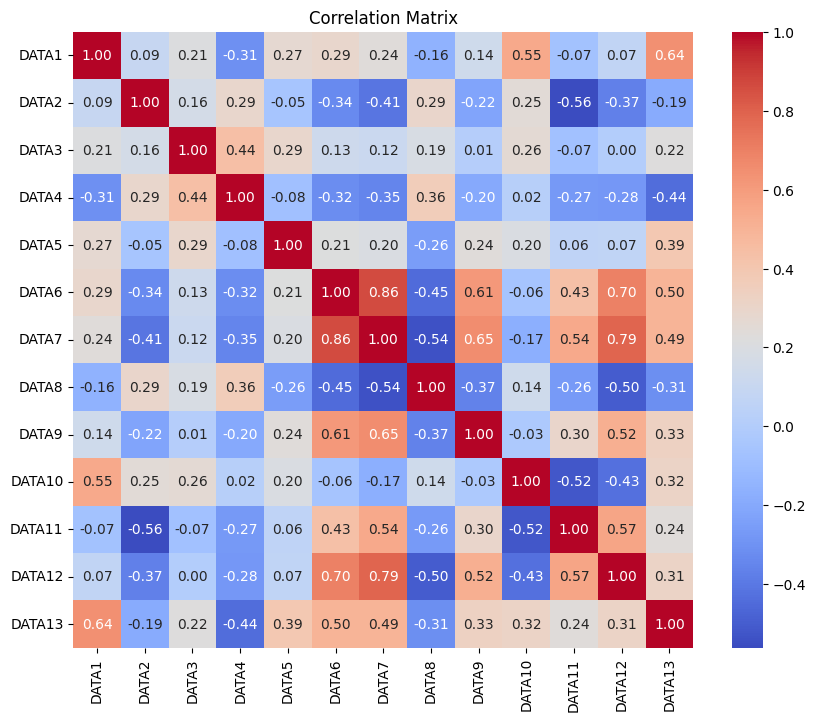

In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

path = r"D:/UniBG/38091 Opt/Car Evaluation"
file_path = path + "/Data/Wine.csv"
full_df = pd.read_csv(file_path)

# Check for missing values
if full_df.isna().sum().sum() > 0:
    clean_df = full_df.dropna()
    print(f"Dropped {full_df.isna().sum().sum()} missing values in the dataset")
else:
    clean_df = full_df
    print("No missing values in the dataset")

# Check for duplicates
if clean_df.duplicated().sum() > 0:
    clean_df = clean_df.drop_duplicates()
    print(f"Dropped {clean_df.duplicated().sum()} duplicates in the dataset")
else:
    print("No duplicates in the dataset")

# Variables and target encoding
X_clean = clean_df.iloc[:, :-1]
Y_clean = clean_df.iloc[:, -1]

class_mapping = {1:0, 2:1, 3:2} #don't remove this line
Y_encoded = Y_clean.map(class_mapping)
X_encoded = X_clean.copy()
classes = np.unique(Y_encoded)  # Unique classes in the dataset
C = len(classes)  # Number of classes

if all(isinstance(v, int) for v in class_mapping.values()):
    # Class labels are integers
    class_names = [f"Class {label}" for label in classes]
else:
    # Class labels are strings
    inverse_class_mapping = {v: k for k, v in class_mapping.items()}
    class_names = [inverse_class_mapping[label] for label in classes]
feature_names = X_encoded.columns.tolist()

# Compute the correlation matrix
correlation_matrix = X_encoded.corr()

# Check if the correlation matrix is diagonal
epsilon = 1e-5 # Threshold for the correlation matrix
thresholded_matrix = np.where(np.abs(correlation_matrix) < epsilon, 0, correlation_matrix)
if np.array_equal(thresholded_matrix, np.diag(np.diag(thresholded_matrix))):
    print("Correlation Matrix is diagonal")

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


---

## Import the TPMSVM model

In [2]:
import import_ipynb
import TPMSVM as tpmsvm



---

## Fasten your seatbelts: Model in action!

### Start the engine....

<span style="font-size: 14px;">
We’re about to take off with the latest version of our model. <br>
Hold on tight as we initiate analizing the data and setting the hyperparamenters.

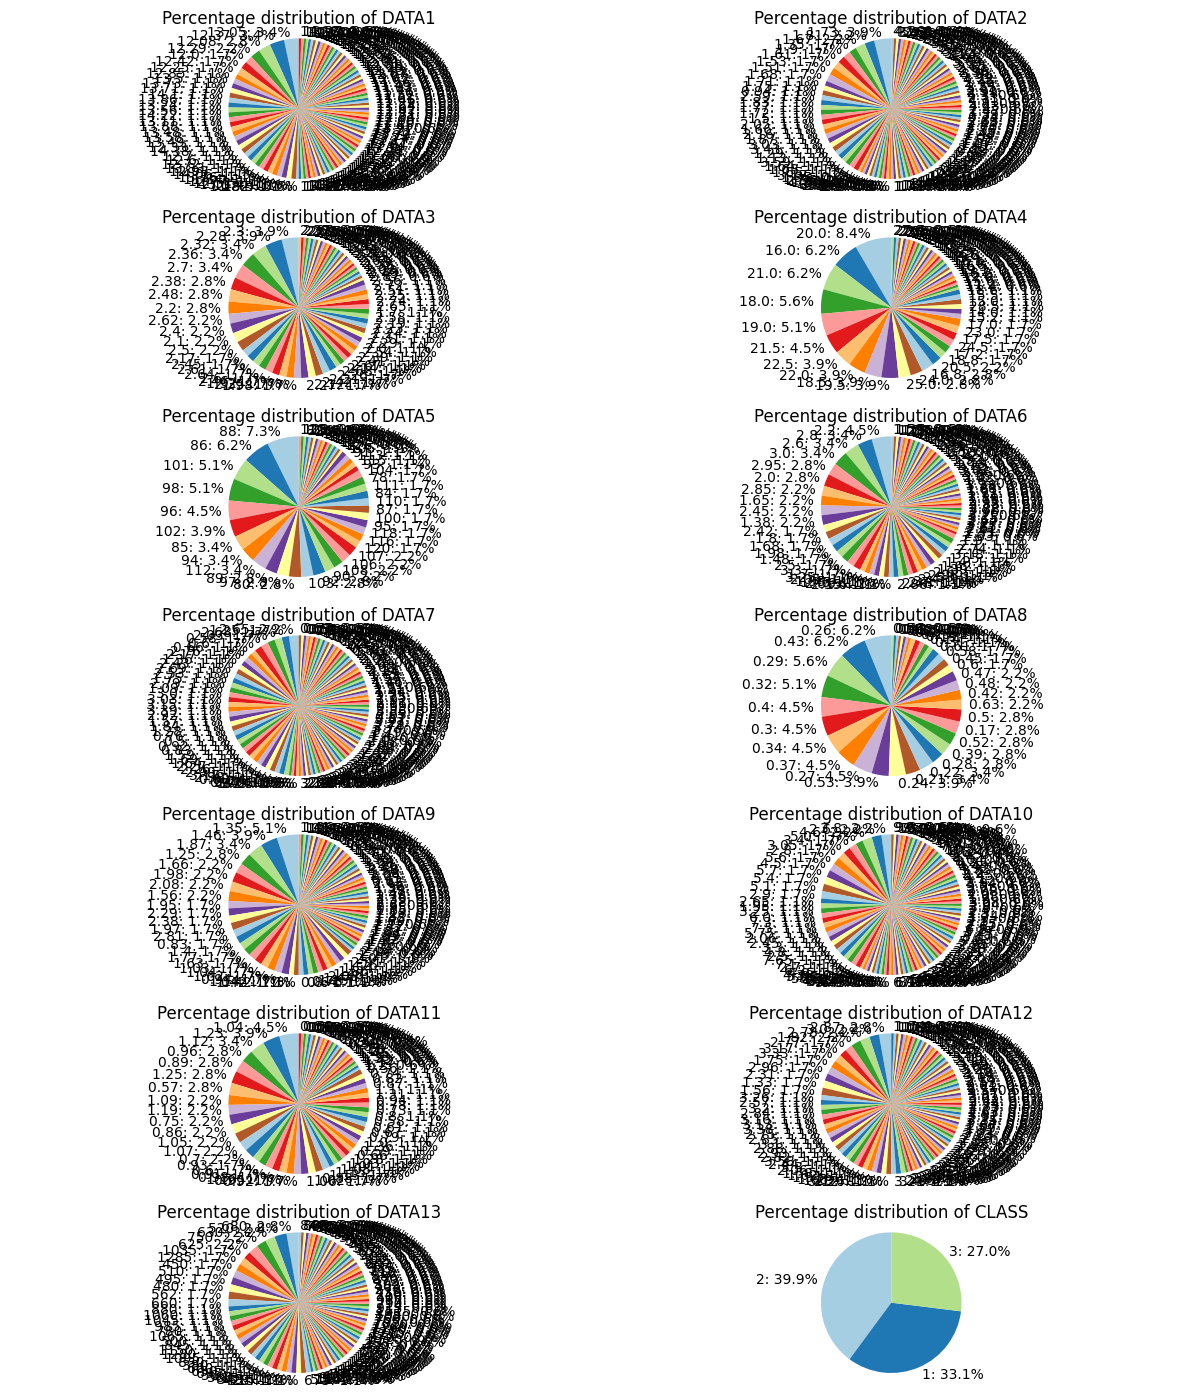

Value of DATA1: min = 11.03, max = 14.83
Value of DATA2: min = 0.74, max = 5.8
Value of DATA3: min = 1.36, max = 3.23
Value of DATA4: min = 10.6, max = 30.0
Value of DATA5: min = 70, max = 162
Value of DATA6: min = 0.98, max = 3.88
Value of DATA7: min = 0.34, max = 5.08
Value of DATA8: min = 0.13, max = 0.66
Value of DATA9: min = 0.41, max = 3.58
Value of DATA10: min = 1.28, max = 13.0
Value of DATA11: min = 0.48, max = 1.71
Value of DATA12: min = 1.27, max = 4.0
Value of DATA13: min = 278, max = 1680


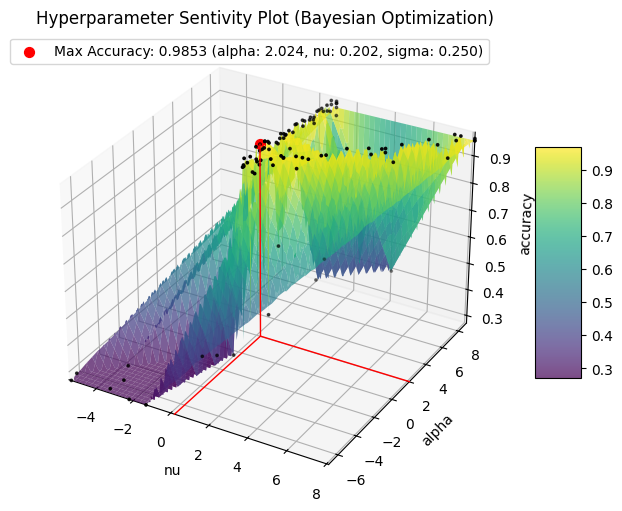

Pivot table of accuracy values and their counts:
    accuracy  count
0   0.985294      1
1   0.985071      3
2   0.984848      2
3   0.977941      1
4   0.977496      3
5   0.977273      9
6   0.970143      5
7    0.96992      6
8   0.969697      3
9    0.96279      3
10  0.962567     10
11  0.962567      1
12  0.962344      4
13  0.962121      2
14  0.955214      2
15  0.954991      4
16  0.954991      1
17  0.954768      4
18  0.954545      1
19  0.947861      1
20  0.947638      1
21  0.947415      3
22  0.947415      1
23  0.947193      2
24   0.94697      2
25  0.940062      1
26  0.939617      2
27  0.924911      1
28  0.917558      1
29  0.909759      1
30  0.902629      1
31  0.902406      2
32  0.902184      1
33  0.578877      1
34  0.398396      4
35  0.270722     10
36     Total    100
Features: 13 
Classes: [0 1 2] 
Dataset row: 178 
Dataset training row: 133 
Dataset validation row: 45


In [3]:
# Take a look at the data
tpmsvm.take_a_look(clean_df, X_encoded, Y_encoded)
myfile = f'{path}/Accuracy/Wine_bayesian2.csv'
tpmsvm.plot_hp_data(myfile,title=' (Bayesian Optimization)')
'''myfile = f'{path}/Accuracy/Wine_grid.csv'
tpmsvm.plot_hp_data(myfile)'''
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = tpmsvm.data_splitting(X_encoded, Y_encoded, classes)
# Optimize the hyper-parameters
best_alpha, best_nu, best_sigma = tpmsvm.optimize_hyper(
      classes, class_mapping, 
      X_train, Y_train, 
      default_alpha = 2.024,
      default_nu    = 0.202, 
      kernel_type = tpmsvm.rbf_kernel,
      default_sigma = 0.250,
      batch_required = 0.1, # None for full GD, 0..1 for %mini-batch, 1 for SGD, > 1 for mini-batch
      gamma_func = tpmsvm.gamma_naive, 
      tolerance = 100 * tpmsvm.machineEpsilon(), 
      T=500, 
      file_name="wine_new", 
      method='none', 
      verbose=True)


### Go!


Class: 0
- Number of Eigenvalues for H: Positive = 0, Negative = 44, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Stochastic Gradient Descent
- Batch size: 5
- gamma function: gamma_naive
- Initial gamma: 1.00000
- Optimization completed in 26 iterations
- Final gradient norm: 0.00206
- Support vectors found: 44
- R^2: 0.002116
- B  parameter: 6.6332495807108
- L  parameter: 1.0000000000000002
- mu parameter: 0.9999999999999997
- tolerance: 1.110e-14
- T (iterations): 26
- max error: 0.0


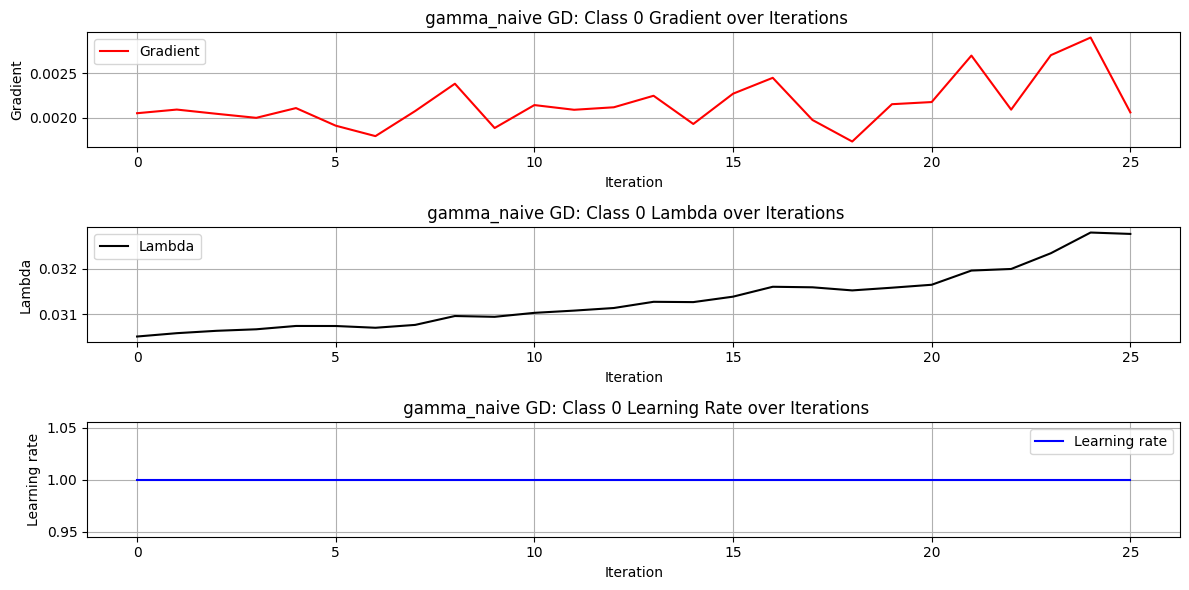


Class: 1
- Number of Eigenvalues for H: Positive = 0, Negative = 53, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Stochastic Gradient Descent
- Batch size: 6
- gamma function: gamma_naive
- Initial gamma: 1.00000
- Optimization completed in 25 iterations
- Final gradient norm: 0.00152
- Support vectors found: 53
- R^2: 0.00145837522249911
- B  parameter: 7.280109889280518
- L  parameter: 1.0000000000000007
- mu parameter: 0.9999999999999996
- tolerance: 1.110e-14
- T (iterations): 25
- max error: 0.0


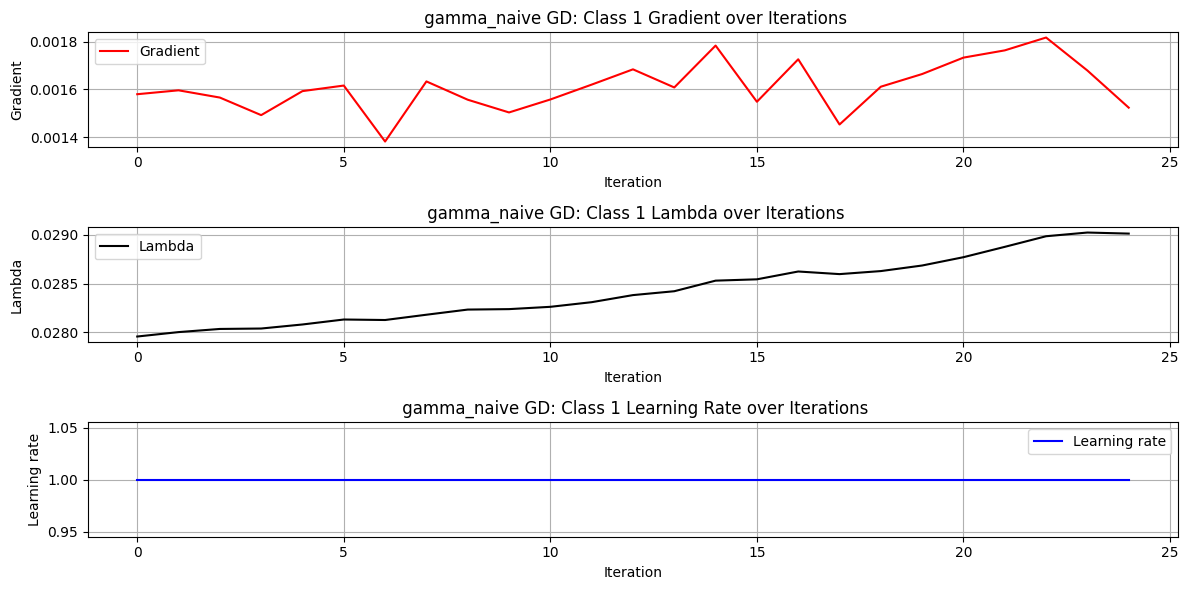


Class: 2
- Number of Eigenvalues for H: Positive = 0, Negative = 36, Null = 0
- Hessian matrix is Negative Definite: objective is Strictly Concave
- Stochastic Gradient Descent
- Batch size: 4
- gamma function: gamma_naive
- Initial gamma: 1.00000
- Optimization completed in 26 iterations
- Final gradient norm: 0.00342
- Support vectors found: 36
- R^2: 0.003160938271604938
- B  parameter: 6.0
- L  parameter: 1.0000000000000009
- mu parameter: 0.9999999999999996
- tolerance: 1.110e-14
- T (iterations): 26
- max error: 0.0


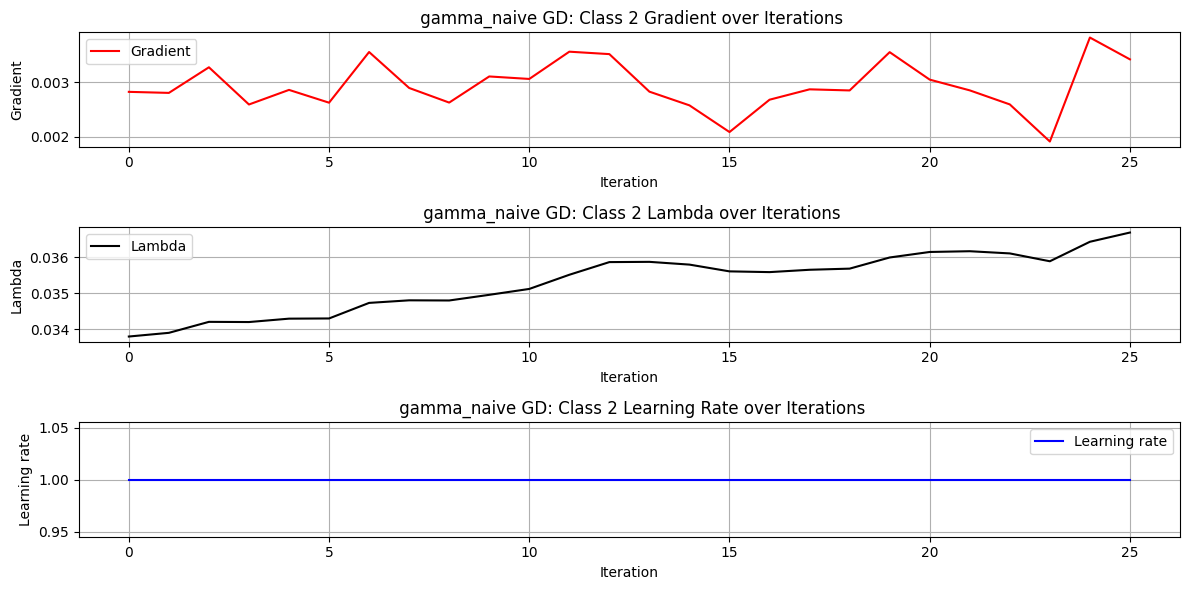


 --- Validation Results ---

Validation accuracy: 0.956 with alpha: 2.024, nu: 0.202 and param: 0.250

              precision    recall  f1-score    support
Class 0        0.937500  1.000000  0.967742  15.000000
Class 1        1.000000  0.888889  0.941176  18.000000
Class 2        0.923077  1.000000  0.960000  12.000000
accuracy       0.955556  0.955556  0.955556   0.955556
macro avg      0.953526  0.962963  0.956306  45.000000
weighted avg   0.958654  0.955556  0.955051  45.000000

 --- Optimization Results with CVXpy ---

Class: 0
- Support vectors found: 44
- Problem status: optimal

Class: 1
- Support vectors found: 53
- Problem status: optimal

Class: 2
- Support vectors found: 36
- Problem status: optimal

 --- Validation Results with CVXpy ---

Validation accuracy: 0.956 with alpha: 2.024, nu: 0.202 and param: 0.250

              precision    recall  f1-score    support
Class 0        0.937500  1.000000  0.967742  15.000000
Class 1        1.000000  0.888889  0.941176  18.0000

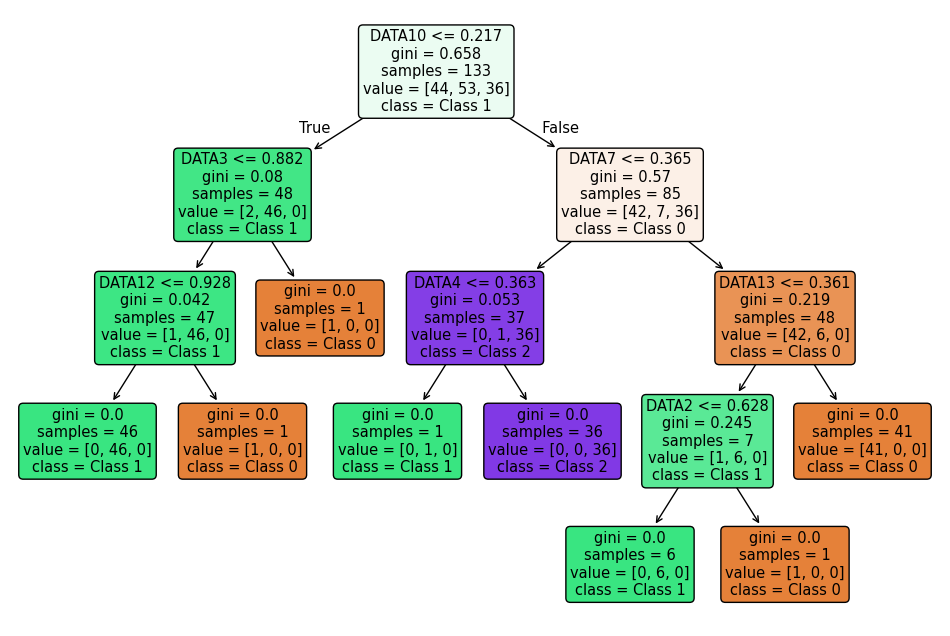


 --- Running Time ---

TPMSVM: 0.87 seconds
CVX: 0.13 seconds
SklearnSVM: 0.01 seconds
SklearnCART: 0.00 seconds


In [4]:
import time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Run the TPMSVM model
start_time = time.time()
accuracy, models = tpmsvm.TPMSVM(
      classes, class_mapping,
      X_train, Y_train, 
      X_val, Y_val,
      best_alpha, best_nu,
      kernel_type = tpmsvm.rbf_kernel, # Kernel type
      kernel_params = best_sigma, # Kernel parameters
      batch_required = 0.1, # None for full GD, 0..1 for %mini-batch, 1 for SGD, > 1 for mini-batch
      gamma_func = tpmsvm.gamma_naive, # Gamma function
      tolerance = 100 * tpmsvm.machineEpsilon(), 
      T = 1000,
      verbose=True)
end_TPMSVM = time.time()
# Evaluate the models using CVX.py
tpmsvm.create_model(classes, class_mapping, X_val, Y_val, models)
end_CVX = time.time()
# Evaluate the models using sklearnSVM
tpmsvm.use_sklearnSVM(X_train, Y_train, X_val, Y_val)
end_sklearnSVM = time.time()
# Evaluate the models using sklearnCART
cart_model = tpmsvm.use_sklearnCART(X_train, Y_train, X_val, Y_val)
end_sklearnCART = time.time()
plt.figure(figsize=(12,8))
plot_tree(cart_model, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()

# Print the time taken for each method
print(f"\n --- Running Time ---\n")
print(f"TPMSVM: {end_TPMSVM - start_time:.2f} seconds")
print(f"CVX: {end_CVX - end_TPMSVM:.2f} seconds")
print(f"SklearnSVM: {end_sklearnSVM - end_CVX:.2f} seconds")
print(f"SklearnCART: {end_sklearnCART - end_sklearnSVM:.2f} seconds")

---
<span style="font-size: 12px;">

- Accuracy: The proportion of correct predictions relative to the total predictions.<br>
- Precision: The proportion of true positives relative to the total predicted positives. It indicates how reliable the positive predictions are.<br>
- Recall: The proportion of true positives relative to the total actual positives. It indicates how well the model finds the positives.<br>
- F1 Score: The harmonic mean of precision and recall. It is useful when there is an imbalance between classes.<br>